In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse

In [2]:
img = np.array(Image.open('sk.png'), dtype=np.uint8)

In [18]:
# random init
np.random.seed(25)
num = img.size // 30

np.random.seed(25)
row_ind = np.random.randint(0, img[:, : ,0].shape[0], size=num)
col_ind = np.random.randint(0, img[:, :, 0].shape[1], size=num)

row_ind = np.append(row_ind, np.arange(img[:, :, 0].shape[0]))
col_ind = np.append(col_ind, np.arange(img[:, :, 0].shape[0]))

X_r = sparse.csr_matrix((img[(row_ind, col_ind, 0)], (row_ind, col_ind)), shape=img[:, :, 0].shape, dtype=np.float)
X_g = sparse.csr_matrix((img[(row_ind, col_ind, 1)], (row_ind, col_ind)), shape=img[:, :, 0].shape, dtype=np.float)
X_b = sparse.csr_matrix((img[(row_ind, col_ind, 2)], (row_ind, col_ind)), shape=img[:, :, 0].shape, dtype=np.float)

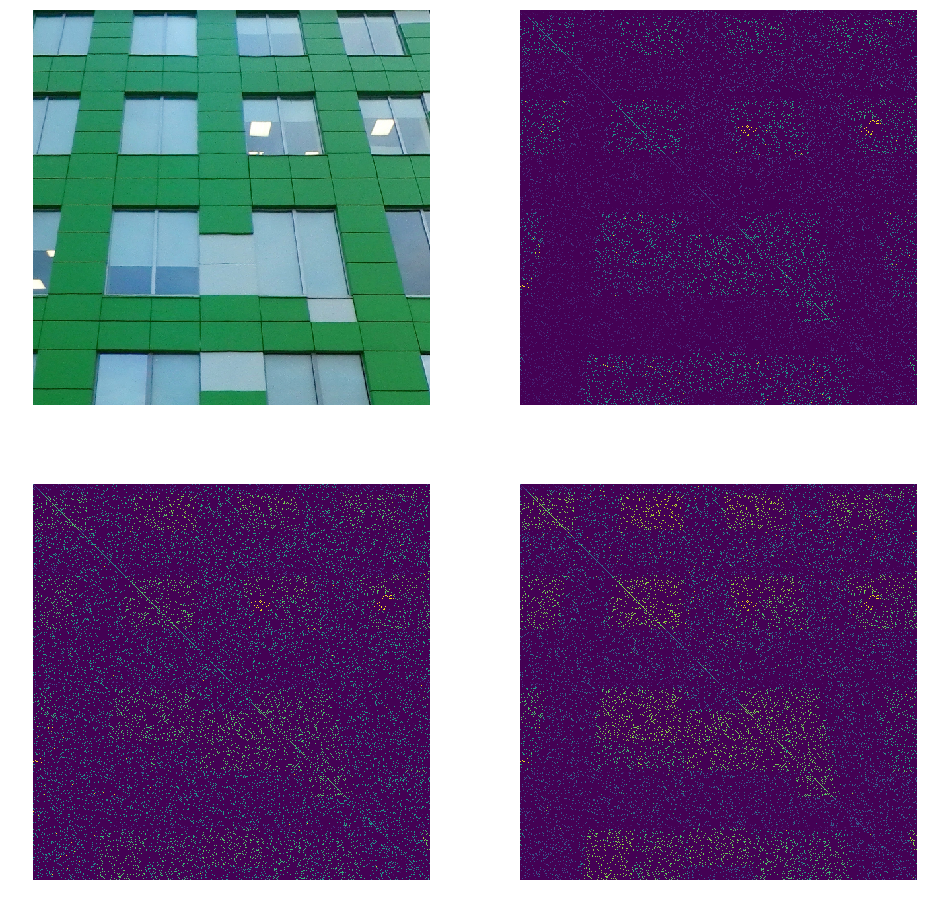

In [19]:
plt.figure(figsize=(16, 16))

plt.subplot(221)
plt.imshow(img)
plt.axis('off')

plt.subplot(222)
plt.imshow(X_r.toarray())
plt.axis('off')

plt.subplot(223)
plt.imshow(X_g.toarray())
plt.axis('off')

plt.subplot(224)
plt.imshow(X_b.toarray())
plt.axis('off')

plt.show()

In [20]:
import ALS
import SoftInput
import Riemann

In [21]:
als = ALS.ALS(k=100, lambda_= 0.1, max_iter=2, missed_val=0)

In [22]:
als.fit(X_r)

KeyboardInterrupt: 

In [36]:
np.random.seed(25)
riemann_r = Riemann.Problem(X_r, tau=1e-16, rank=96, maxiter=1000, accuracy=1e-16)
riemann_g = Riemann.Problem(X_g, tau=1e-16, rank=96, maxiter=1000, accuracy=1e-16)
riemann_b = Riemann.Problem(X_b, tau=1e-16, rank=96, maxiter=1000, accuracy=1e-16)

In [37]:
riemann_r.LRGeomCG()
riemann_g.LRGeomCG()
riemann_b.LRGeomCG()

In [38]:
U = riemann_r.approx[0]
S = riemann_r.approx[1]
V = riemann_r.approx[2]
Ans_r = np.array(U.dot(S.dot(V.T)), dtype=np.uint8)

U = riemann_g.approx[0]
S = riemann_g.approx[1]
V = riemann_g.approx[2]
Ans_g = np.array(U.dot(S.dot(V.T)), dtype=np.uint8)

U = riemann_b.approx[0]
S = riemann_b.approx[1]
V = riemann_b.approx[2]
Ans_b = np.array(U.dot(S.dot(V.T)), dtype=np.uint8)

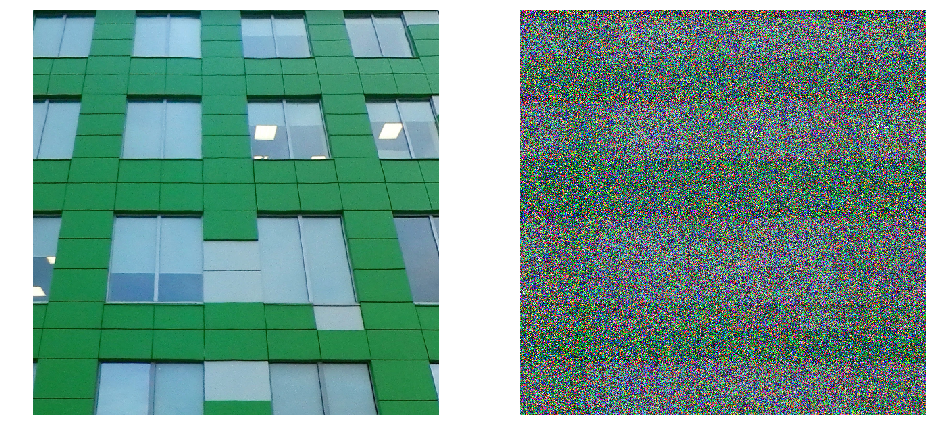

In [39]:
plt.figure(figsize=(16, 16))

plt.subplot(121)
plt.imshow(img)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.dstack((Ans_r, Ans_g, Ans_b)))
plt.axis('off')

plt.show()

In [40]:
riemann_b.bias

array([  1.09480461e+04,   5.05668550e+03,   2.66273325e+03,
         1.46036913e+03,   8.32769023e+02,   4.87736802e+02,
         2.89231370e+02,   1.73238963e+02,   1.03623791e+02,
         6.24857926e+01,   3.79188333e+01,   2.32500933e+01,
         1.43201349e+01,   8.95883817e+00,   5.59575484e+00,
         3.49798612e+00,   2.18582237e+00,   1.37167364e+00,
         8.58860148e-01,   5.38856362e-01,   3.41145590e-01,
         2.17784040e-01,   1.39758693e-01,   8.93703868e-02,
         5.75105313e-02,   3.72878594e-02,   2.41893544e-02,
         1.57302091e-02,   1.02508629e-02,   6.69618846e-03,
         4.36393174e-03,   2.81213809e-03,   1.80171576e-03,
         1.14941166e-03,   7.32265809e-04,   4.68373638e-04,
         2.97626922e-04,   1.88297773e-04,   1.18628372e-04,
         7.46473660e-05,   4.68592847e-05,   2.93469521e-05,
         1.84215084e-05,   1.15576900e-05,   7.23288209e-06,
         4.57222056e-06,   2.91009511e-06,   1.85979611e-06,
         1.19429011e-06,